In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


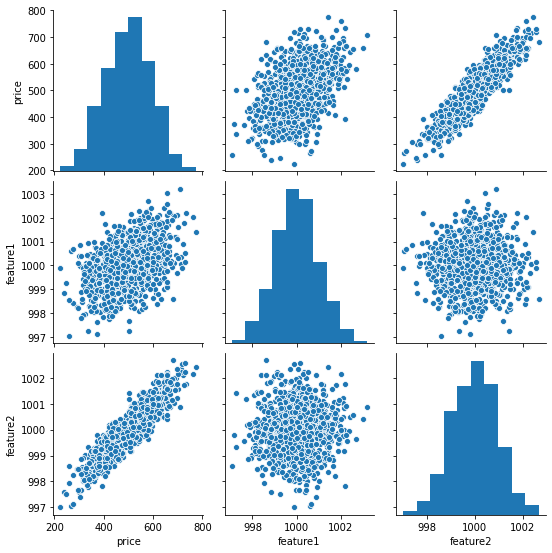

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['feature1', 'feature2']].values

In [6]:
y = df['price'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train.shape

(700, 2)

In [9]:
X_test.shape

(300, 2)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train.min()

0.0

In [14]:
X_train.max()

1.0

In [15]:
X_test.min()

-0.014108392024496652

In [16]:
X_test.max()

1.0186515935232023

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=["mean_squared_error"]
)

In [19]:
model.fit(
    x=X_train, 
    y=y_train, 
    epochs=250
)

Epoch 1/250
22/22 [==============================] - 0s 2ms/step - loss: 256791.1250 - mean_squared_error: 256791.1250
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256657.7188 - mean_squared_error: 256657.7188
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256570.5781 - mean_squared_error: 256570.5781
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256490.0156 - mean_squared_error: 256490.0156
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256380.7812 - mean_squared_error: 256380.7812
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256236.1406 - mean_squared_error: 256236.1406
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256047.4531 - mean_squared_error: 256047.4531
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255824.0625 - mean_squared_error: 255824.0625
Epoch 9/250
22/22 [=============================

In [20]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

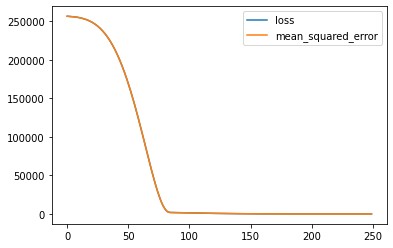

In [21]:
loss_df.plot()

In [22]:
model.evaluate(X_test, y_test, verbose=1)

10/10 [==============================] - 0s 848us/step - loss: 24.9816 - mean_squared_error: 24.9816


[24.981616973876953, 24.981616973876953]

In [23]:
model.evaluate(X_train, y_train, verbose=1)

22/22 [==============================] - 0s 883us/step - loss: 23.7801 - mean_squared_error: 23.7801


[23.78008460998535, 23.78008460998535]

In [24]:
test_predictions = model.predict(X_test)

In [25]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [26]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [27]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [28]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [29]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.328033
1,624.156198,623.701111
2,582.455066,592.278137
3,578.588606,572.352783
4,371.224104,366.621643
...,...,...
295,525.704657,529.148071
296,502.909473,515.413208
297,612.727910,609.806580
298,417.569725,417.005280


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

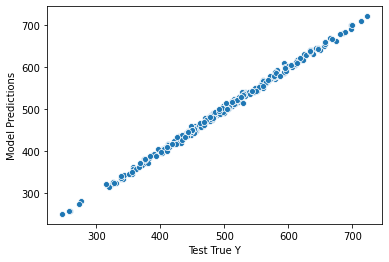

In [30]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.003107723605878

In [33]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

24.98162145967676

In [34]:
import math
math.sqrt(mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions']))

4.9981618080727195

In [35]:
new_gem = [[998, 1000]]
new_gem = scaler.transform(new_gem)

In [36]:
model.predict(new_gem)

array([[419.72244]], dtype=float32)

In [37]:
model.save('gem_predictor.h5')

In [38]:
# from this point onwards, imagine this is a new notebook
from tensorflow.keras.models import load_model

In [39]:
model = load_model('gem_predictor.h5')

In [40]:
model.predict(new_gem)

array([[419.72244]], dtype=float32)